In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
df = pd.read_csv('data.csv')  # Replace with your dataset path
df.head()

,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low


In [ ]:
df.shape

(100000, 13)

In [ ]:
df = df.drop(columns=['Timestamp'],axis= True)

In [ ]:
df = df.drop(columns=['Machine_ID'],axis= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Apply on Operation_Mode
df['Operation_Mode'] = le.fit_transform(df['Operation_Mode'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
lebel = LabelEncoder()

# Apply on Operation_Mode
df['Efficiency_Status'] = lebel.fit_transform(df['Efficiency_Status'])

In [ ]:
X = df.drop(columns=['Efficiency_Status'])  # Replace 'efficiency' with your target column name
y = df['Efficiency_Status']

In [ ]:
print(X.columns.tolist())

['Operation_Mode', 'Temperature_C', 'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%', 'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score', 'Error_Rate_%']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00     15464
           2       1.00      1.00      1.00      3911

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Confusion Matrix:
 [[  625     0     0]
 [    0 15464     0]
 [    0     0  3911]]


In [ ]:
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 1.0000


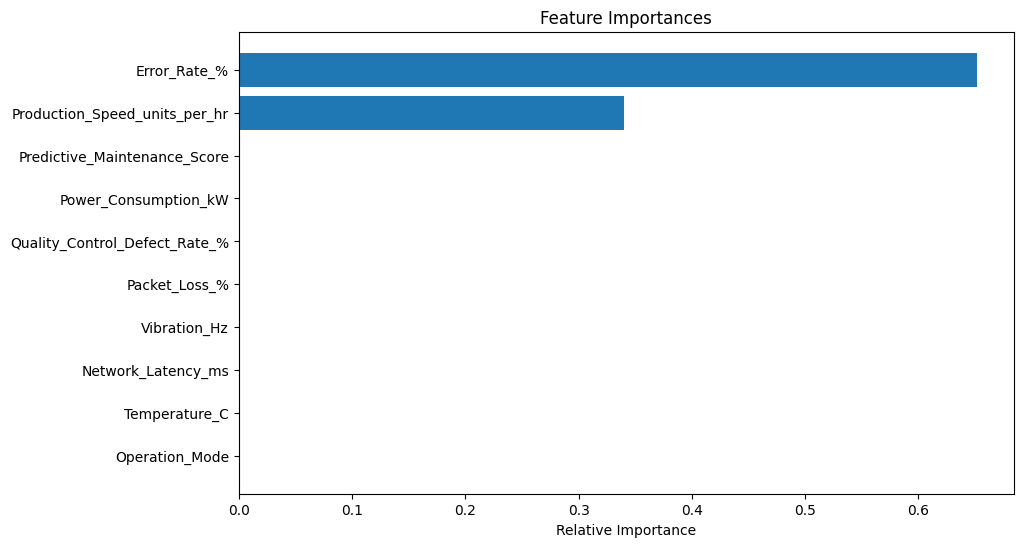

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Average Accuracy from CV:", score.mean())


Average Accuracy from CV: 0.99999


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Predict with previous model ===
prev_pred = model.predict(X_test_scaled)

print(" Previous Model Evaluation")
print("Accuracy:", accuracy_score(y_test, prev_pred))
print("Classification Report:\n", classification_report(y_test, prev_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, prev_pred))

print("\n" + "="*60 + "\n")

# === 2. Predict with best model from GridSearch ===
best_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)
grid_pred = best_model.predict(X_test_scaled)

print(" Tuned Model (GridSearchCV) Evaluation")
print("Accuracy:", accuracy_score(y_test, grid_pred))
print("Classification Report:\n", classification_report(y_test, grid_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_pred))


 Previous Model Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00     15464
           2       1.00      1.00      1.00      3911

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[  625     0     0]
 [    0 15464     0]
 [    0     0  3911]]


 Tuned Model (GridSearchCV) Evaluation
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00     15464
           2       1.00      1.00      1.00      3911

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion M

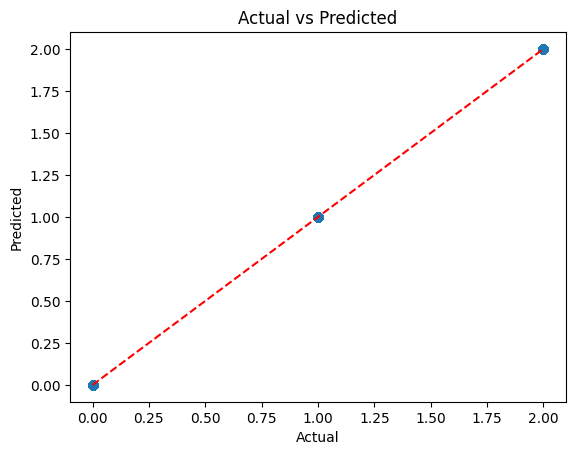

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # perfect prediction line
plt.show()

In [ ]:
# 🔹 Create a test case with known outcome
# Expected Efficiency_Status: 'High'

unseen_data = {
    'Operation_Mode': 'Active',              # string if not encoded yet
    'Temperature_C': 45.0,
    'Vibration_Hz': 60.0,
    'Power_Consumption_kW': 12.0,
    'Network_Latency_ms': 20,
    'Packet_Loss_%': 0.02,
    'Quality_Control_Defect_Rate_%': 0.5,
    'Production_Speed_units_per_hr': 550,
    'Predictive_Maintenance_Score': 85.0,
    'Error_Rate_%': 0.8,

}

# 🔹 Convert to DataFrame
unseen_df = pd.DataFrame([unseen_data])

# 🔹 Encode Operation_Mode (as done in training)
unseen_df['Operation_Mode'] = le.transform(unseen_df['Operation_Mode'])

# 🔹 Scale the features
unseen_scaled = scaler.transform(unseen_df)

# 🔹 Predict using your best model
unseen_prediction = best_model.predict(unseen_scaled)

# 🔹 Decode the predicted class
predicted_class = lebel.inverse_transform(unseen_prediction.astype(int))

print("✅ Predicted Efficiency_Status:", predicted_class[0])
print("🎯 Expected Efficiency_Status: High")

✅ Predicted Efficiency_Status: High
🎯 Expected Efficiency_Status: High


In [ ]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
model.score(X_test_scaled,y_test)

1.0

In [ ]:
model.score(X_train_scaled,y_train)

1.0